In [1]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib
import qutip as qt
from IPython.display import HTML
import scipy as sp

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

# Study of the properties of the qubit vs inductance asymmetry (Δ) and external flux (φ_ext)

In [2]:
# Fundamental constants
h    = 6.62607015e-34
GHz  = 1e9
e0   = 1.602176634e-19
Φ_0  = h/(2*e0)

## KIT's qubit

This notebook studies the qubit proposed by KIT. It's lumped element model is:
<img src='Other/Single qubit 4 nodes CC coupled to ground.jpg' width='500'>


In [3]:
# Circuit parameters
Csh = 15
C   = 15
Cg  = 10
CJ  = 3
Lq  = 25
Lr  = 10
Δ   = 0.1
EJ  = 10.0
l = Lq*(Lq+4*Lr) - 4*Δ**2

E_J = EJ * 1e9
L_r = l/Lq * 1e-9
E_L_r = (Φ_0/(2*np.pi))**2/L_r / h

In [4]:
Cf = C/2 + Csh + CJ
Lf = l/(Lq+4*Lr)
C_f = Cf * 1e-15
L_f = Lf * 1e-9
Z_f = np.sqrt(L_f/C_f)

L_r = l/Lq * 1e-9
C_r = C/2 * 1e-15
Z_r = np.sqrt(L_r/C_r)

In [5]:
φ_ext_avoided_crossing_1q_1r = 0.372
φ_ext_avoided_crossing_2q_1r = 0.464

In [15]:
n_max_resonator = 25
n_max_fluxonium = 25

trunc_nums_resonator = [n_max_resonator]
trunc_nums_fluxonium = [n_max_fluxonium]

trunc_nums = [1, n_max_resonator, n_max_fluxonium]
trunc_nums_Δ_0 = [ n_max_resonator, n_max_fluxonium]

# Single circuit study

In [16]:
Δ = 1e-1 #0.1 # 1e-10 # 1e-10
n_eig = 6
# Δ_dependance = 'not in energies'
# Δ_dependance = 'not in coupling'
Δ_dependance = 'all'

if Δ_dependance == 'all':
    # Original Lq and Lr, everything depends on Δ
    Lq_prime  = Lq
    Lr_prime  = Lr
elif Δ_dependance == 'not in energies':
    # Lr and Lq such that ωr and ωf !=f(Δ) and hence there is no renormalization
    Lq_prime  = (Lq*(Lq + 4*Lr) + np.sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*Δ**2)))/(2*(Lq + 4*Lr))
    Lr_prime  = Lr*(Lq*(Lq + 4*Lr) + np.sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*Δ**2)))/(2*Lq*(Lq + 4*Lr))
elif Δ_dependance == 'not in coupling':
    # Lr and Lq such that L^2 !=f(Δ) and hence the coupling inductance does not depend on delta
    Lq_prime = np.sqrt(Δ)*Lq
    Lr_prime = np.sqrt(Δ)*Lr + Δ **2 /(Lq*np.sqrt(Δ))

qubit     = sq_ext.KIT_qubit      (Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)
# qubit     = sq_ext.KIT_qubit_no_JJ      (Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)
fluxonium = sq_ext.KIT_fluxonium (Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)
# fluxonium = sq_ext.KIT_fluxonium_no_JJ  (Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)
resonator = sq_ext.KIT_resonator        (Δ=Δ, Lq =Lq_prime, Lr =Lr_prime)

try:
    qubit.set_trunc_nums(trunc_nums)
except:
    try:
        qubit.set_trunc_nums(trunc_nums_Δ_0)
    except:
        qubit.set_trunc_nums([trunc_nums_resonator[0]*trunc_nums_fluxonium[0]])

resonator.set_trunc_nums(trunc_nums_resonator)
fluxonium.set_trunc_nums(trunc_nums_fluxonium)

_ = qubit    .diag(n_eig)
_ = resonator.diag(n_eig)
_ = fluxonium.diag(n_eig)

H_frc   = sq_ext.hamiltonian_frc(fluxonium, resonator, Δ  )
# H_frc_qubit   = sq_ext.hamiltonian_frc_qubit(qubit, fluxonium, resonator, Δ)
E_frc, _ = sq_ext.diag(H_frc, out='GHz')
# E_frc_qubit, _ = sq_ext.diag(H_frc_qubit, out='GHz')

In [17]:
Δ_0 = 0

qubit_0 = sq_ext.KIT_qubit           (Δ=Δ_0, Lq =Lq_prime, Lr =Lr_prime)
# qubit_0 = sq_ext.KIT_qubit_no_JJ            (Δ=Δ_0, Lq =Lq_prime, Lr =Lr_prime)
fluxonium_0 = sq_ext.KIT_fluxonium    (Δ=Δ_0, Lq =Lq_prime, Lr =Lr_prime)
# fluxonium_0 = sq_ext.KIT_fluxonium_no_JJ    (Δ=Δ_0, Lq =Lq_prime, Lr =Lr_prime)
resonator_0 = sq_ext.KIT_resonator          (Δ=Δ_0, Lq =Lq_prime, Lr =Lr_prime)

try:
    qubit_0.set_trunc_nums(trunc_nums)
except:
    try:
        qubit_0.set_trunc_nums(trunc_nums_Δ_0)
    except:
        qubit_0.set_trunc_nums([trunc_nums_resonator[0]*trunc_nums_fluxonium[0]])

resonator_0.set_trunc_nums(trunc_nums_resonator)
fluxonium_0.set_trunc_nums(trunc_nums_fluxonium)

_ = qubit_0    .diag(n_eig)
_ = resonator_0.diag(n_eig)
_ = fluxonium_0.diag(n_eig)

H_frc_0 = sq_ext.hamiltonian_frc(fluxonium_0, resonator_0, Δ=Δ_0)

In [19]:
fluxonium_0.description()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [20]:
fluxonium.description()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [21]:
l = Lq * (Lq + 4 * Lr) - 4 * Δ ** 2
l / (Lq + 4 * Lr)

24.999384615384617

In [22]:
l = Lq * (Lq + 4 * Lr)
l / (Lq + 4 * Lr)

25.0

In [26]:
flux_c = sq_ext.KIT_fluxonium(EJ=11)
flux = sq_ext.KIT_fluxonium()
flux_c.set_trunc_nums([20])
flux.set_trunc_nums([20])

In [27]:
print(sq_ext.H_eff_p1(flux_c.hamiltonian(),flux.hamiltonian(),n_eig))

[[6.755764312625 -0.000000000000 0.546500196778 0.000000000000 0.009251804244 0.000000000000]
 [-0.000000000000 8.680973126405 0.000000000000 0.497352600323 0.000000000000 -0.067605434625]
 [0.546500196778 0.000000000000 12.848970390348 0.000000000000 0.529439741219 0.000000000000]
 [0.000000000000 0.497352600323 0.000000000000 17.498347529826 -0.000000000000 0.519783169790]
 [0.009251804244 0.000000000000 0.529439741219 -0.000000000000 22.720698107610 0.000000000000]
 [0.000000000000 -0.067605434625 0.000000000000 0.519783169790 0.000000000000 28.341669575123]]


In [18]:
print(sq_ext.H_eff_p1(fluxonium_0.hamiltonian(),fluxonium.hamiltonian(),n_eig))

[[6.707030430030 -0.000000000000 0.000097811692 0.000000000000 -0.000017538421 0.000000000000]
 [-0.000000000000 8.652527258078 0.000000000000 0.000078102879 -0.000000000000 -0.000033319510]
 [0.000097811692 0.000000000000 12.868373630334 -0.000000000000 0.000072396667 -0.000000000000]
 [0.000000000000 0.000078102879 -0.000000000000 17.500397656795 0.000000000000 0.000056929042]
 [-0.000017538421 -0.000000000000 0.000072396667 0.000000000000 22.725973544675 0.000000000000]
 [0.000000000000 -0.000033319510 -0.000000000000 0.000056929042 0.000000000000 28.346413059032]]


In [14]:
print(sq_ext.H_eff_p1(resonator_0.hamiltonian(),resonator.hamiltonian(),n_eig))

[[0.000000000000 0.000000000000 -0.000000000000]
 [0.000000000000 7.208388196512 -0.000000000000]
 [-0.000000000000 -0.000000000000 14.416776393023]]


In [144]:
ψ_0 = sq_ext.diag(H_frc_0, n_eig)[1].T

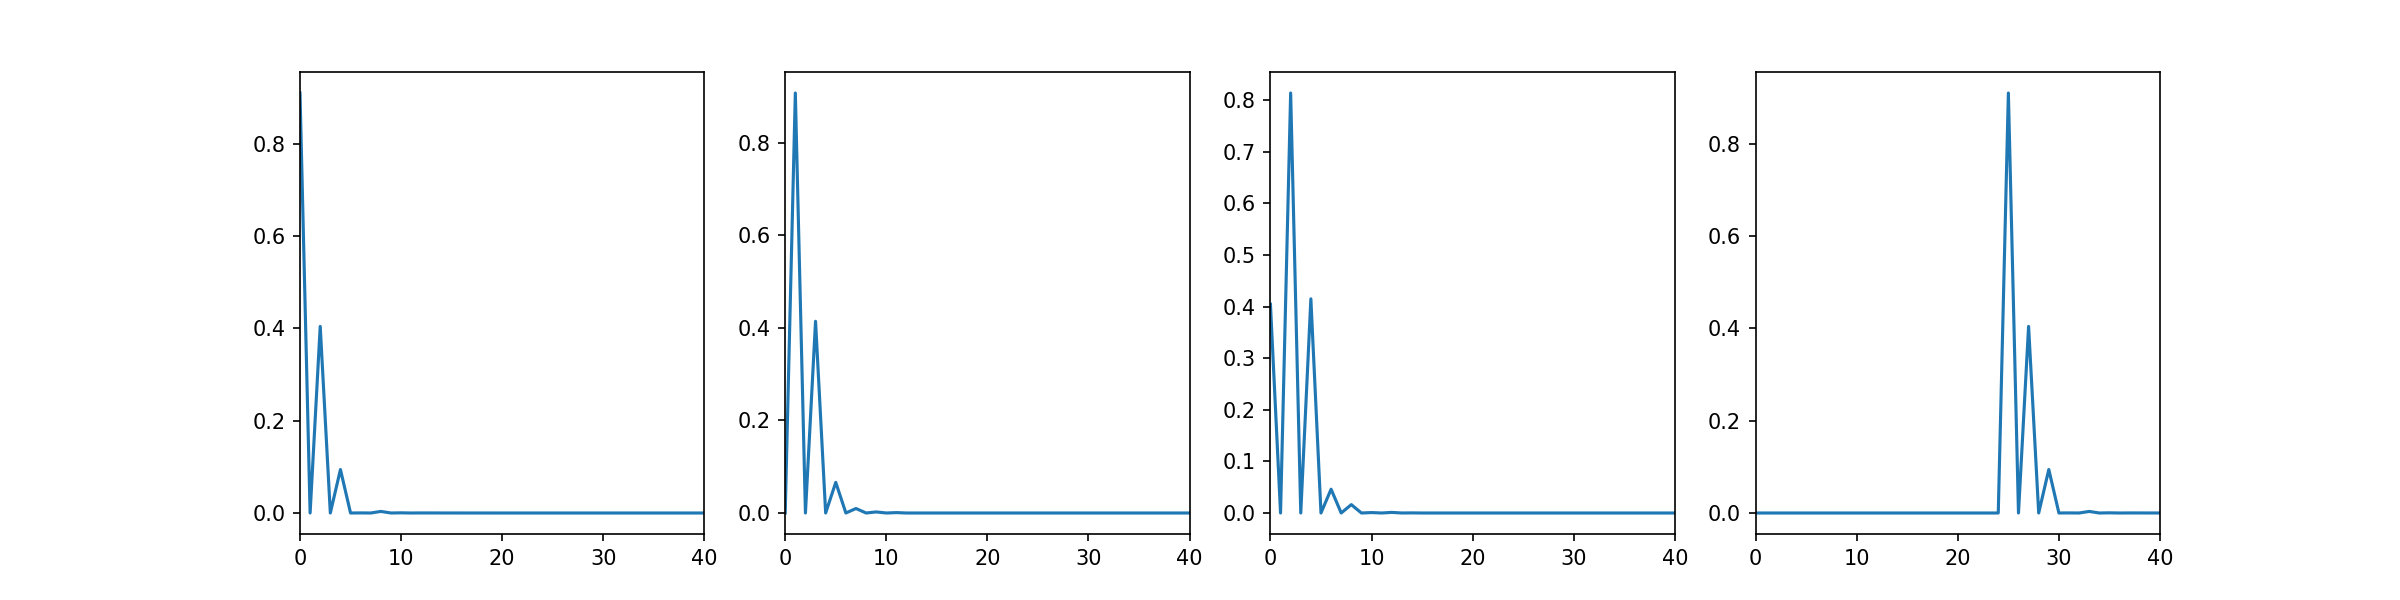

In [108]:
fig, ax = plt.subplots(ncols=4,figsize=[16,4], dpi=150)
[axi.plot(np.abs(ψ_0[i])) for i,axi in enumerate(ax)]
[axi.set_xlim([0,40]) for i,axi in enumerate(ax)]
fig.show()

In [128]:
Φ_f = fluxonium.flux_op(0)
Φ_r = resonator.flux_op(0)

V = qt.tensor(Φ_r, Φ_f) * 2 * Δ / l / 1e-9 /2 /np.pi/GHz

In [132]:
np.abs((ψ_0_fr[0].dag() * V * ψ_0_fr[2]).__array__())

array([[0.000000000000]])

In [115]:
ψ_0_fr = [qt.tensor(resonator_0._evecs[N_r[i]], fluxonium_0._evecs[N_f[i]]) for i in range(n_eig) ]

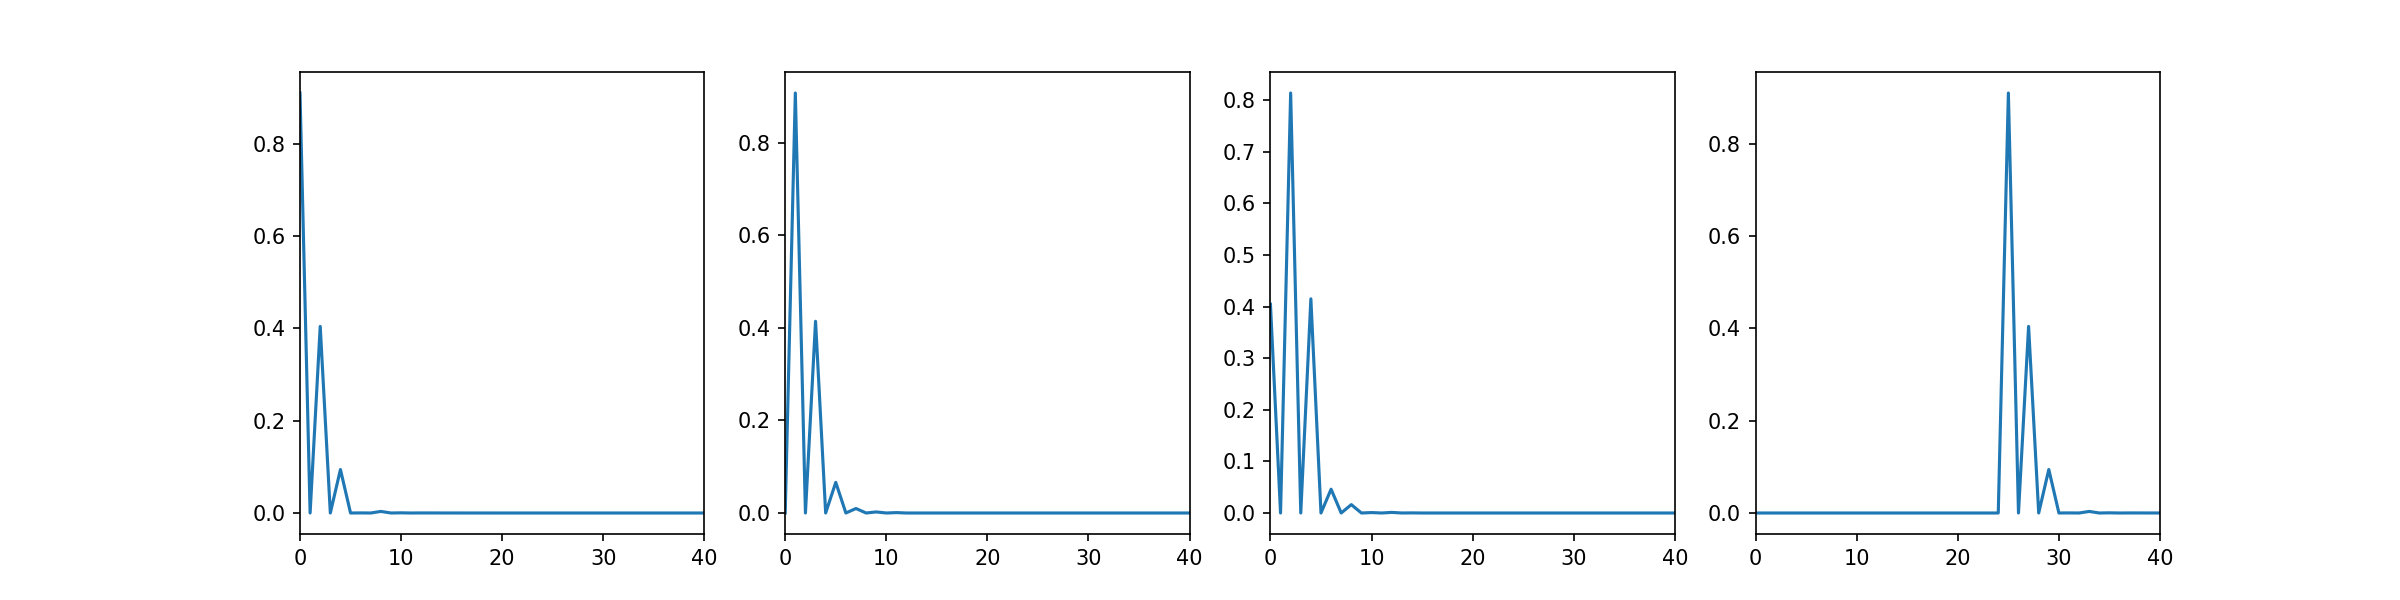

In [116]:
fig, ax = plt.subplots(ncols=4,figsize=[16,4], dpi=150)
[axi.plot(np.abs(ψ_0_fr[i].__array__())) for i,axi in enumerate(ax)]
[axi.set_xlim([0,40]) for i,axi in enumerate(ax)]
fig.show()

In [118]:
[np.abs(ψ_0_fr[i].dag() * ψ_0[i]) for i in range(n_eig)]

[array([1.000000000000]),
 array([1.000000000000]),
 array([1.000000000000]),
 array([1.000000000000]),
 array([1.000000000000])]

In [96]:
print(N_f)
print(N_r)

[0 1 2 0 1]
[0 0 0 1 1]


In [149]:
np.round(sq_ext.H_eff_p1(H_frc_0, H_frc, n_eig),5)

array([[ 6.68e+00, -0.00e+00,  1.00e-04],
       [-0.00e+00,  8.57e+00,  0.00e+00],
       [ 1.00e-04,  0.00e+00,  1.30e+01]])

In [ ]:
N_f, N_r = sq_ext.get_energy_indices(qubit, fluxonium, resonator)

In [99]:
qt.tensor(fluxonium_0._evecs[0],fluxonium_0._evecs[0])

Quantum object: dims = [[25, 25], [1, 1]], shape = (625, 1), type = ket
Qobj data =
[[ 7.66547374e-01-3.12389838e-01j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 3.40538987e-01-1.38779314e-01j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 7.93326962e-02-3.23303281e-02j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-1.62070675e-04+6.60484056e-05j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-2.85582248e-03+1.16382882e-03j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 3.10535794e-04-1.26552160e-04j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 1.12546775e-04-4.58660090e-05j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-4.72551232e-05+1.92578055e-05j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 4.80748199e-06-1.95918552e-06j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 2.39789789e-06-9.77211529e-07j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-1.30894533e-06+5.33432417e-07j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 2.68348084e-07-1.09359470e-07j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 5.49616117e-08-2.23984185e-08j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.0

In [63]:
i=0
j=2
l   = Lq * (Lq + 4 * Lr) - 4 * Δ ** 2

ψ_0_f = np.array([ψ_i.__array__()[:, 0] for ψ_i in fluxonium_0._evecs]).T
ψ_0_r = np.array([ψ_i.__array__()[:, 0] for ψ_i in resonator_0._evecs]).T
Φ_f =  fluxonium.flux_op(0).__array__()
Φ_r =  resonator.flux_op(0).__array__()

H_eff_1_f_i_j = np.abs(ψ_0_f[:, N_f[i]].conj().T @ Φ_f @ ψ_0_f[:, N_f[j]])
H_eff_1_r_i_j = np.abs(ψ_0_r[:, N_r[i]].conj().T @ Φ_r @ ψ_0_r[:, N_r[j]])
H_eff_p1  = H_eff_1_f_i_j*H_eff_1_r_i_j * 2 * Δ / l / 1e-9  / (2 * np.pi * GHz)
H_eff_p1

6.982621297889288e-31

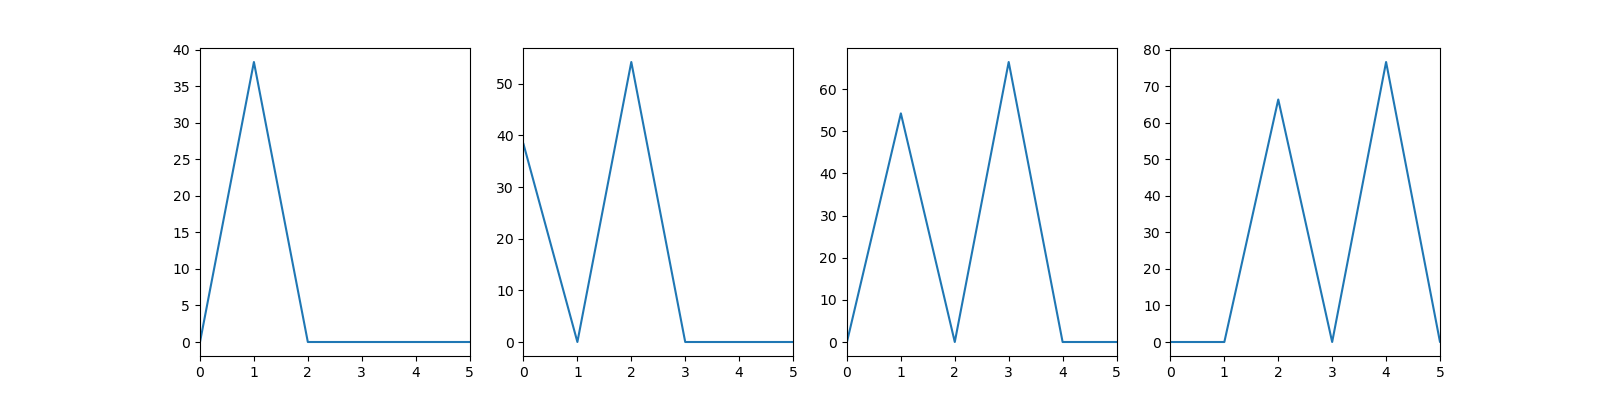

In [86]:
fig, ax = plt.subplots(ncols=4,figsize=[16,4])
[axi.plot(np.abs(Φ_r @ ψ_0_r[:,i])) for i,axi in enumerate(ax)]
[axi.set_xlim([0,5]) for i,axi in enumerate(ax)]
fig.show()

In [65]:
H_eff_1_r_i_j

5.5218519379545605e-14

In [58]:
[N_r]

[array([0, 0, 0, 1, 1])]

In [57]:
[N_f]

[array([0, 1, 2, 0, 1])]

In [ ]:
|np.real(sq_ext.hamiltonian_frc(fluxonium, resonator, Δ).__array__())

In [ ]:
np.real(sq_ext.hamiltonian_frc_qubit(qubit, fluxonium, resonator, Δ).__array__())

In [ ]:
np.real(qubit.hamiltonian().__array__())

In [ ]:
qubit.efreqs[1]-qubit.efreqs[0] -(E_frc[1]-E_frc[0])

In [82]:
qubit_0.diag(n_eig )
qubit.diag(n_eig   )
H_eff_full = sq_ext.H_eff_p1(qubit_0, qubit, remove_ground=True, real=True)
np.round(H_eff_full,5)

array([[0.000000, -0.000000, 0.001010, 0.000000, 0.084850],
       [-0.000000, 1.946180, 0.000000, 0.084850, 0.000000],
       [0.001010, 0.000000, 6.161380, 0.000000, 0.050240],
       [0.000000, 0.084850, 0.000000, 7.208040, -0.000000],
       [0.084850, 0.000000, 0.050240, -0.000000, 9.154850]])

In [81]:
H_eff_frc = sq_ext.H_eff_p1_hamil(H_frc_0, H_frc, n_eig, remove_ground=True, real=True, solver='numpy')
np.round(H_eff_frc,5)   

array([[0.000000, -0.000000, 0.000100, 0.000000, 0.028870],
       [-0.000000, 1.945500, -0.000000, 0.028870, -0.000000],
       [0.000100, -0.000000, 6.161340, 0.000000, 0.027980],
       [0.000000, 0.028870, 0.000000, 7.208390, -0.000000],
       [0.028870, -0.000000, 0.027980, -0.000000, 9.153890]])

In [ ]:
factors = [0, 1, 2.76194]
H_frc_vs_factor = [sq_ext.hamiltonian_frc(fluxonium, resonator, Δ, factor=factor) for factor in factors]

In [ ]:
for H_frc_factor in H_frc_vs_factor:
    print( (np.abs(sq_ext.H_eff_p1(qubit_0, qubit, remove_ground=True)) - np.abs(sq_ext.H_eff_p1_hamil(H_frc_0, H_frc_factor ,n_eig, remove_ground=True))).sum())

In [ ]:
factors[7]

In [ ]:
E_frc- E_frc[0]

In [ ]:
qubit.efreqs - qubit.efreqs[0]

In [ ]:
E_frc_qubit-E_frc_qubit[0]

In [ ]:
qubit.S

In [ ]:
Φ, Q = sq_ext.get_node_variables(qubit,'FC', isolated=True)
Q_f_qubit = Q[1]-Q[0]
Q_r_qubit = Q[0]+Q[1]

Q_f = fluxonium.flux_op(0)
Q_r = resonator.flux_op(0)

In [ ]:
Q_r.__array__()

In [ ]:
Q_r_qubit.__array__()

In [ ]:
Q_r.__array__() / Q_r.__array__().max()

In [ ]:
Q_r_qubit.__array__()/ Q_r_qubit.__array__().max()

In [ ]:
S_exact = ([[0, 5.66458251889485, -0.335417481105154  ],
            [0, 4.66458251889485,  0.664582518894846  ],
            [1, 3.21072333059522,  0.0768553478685043 ]])

In [ ]:
print(qubit.S-S_exact)

In [ ]:
qubit.description()

In [ ]:
H_frc   = sq_ext.hamiltonian_frc(fluxonium, resonator, Δ)
H_frc

In [ ]:
qubit.efreqs[0]

In [ ]:
E_frc[0]

In [ ]:
ψ_full = np.array([ψ_i.__array__()[:, 0] for ψ_i in qubit._evecs]).T
H_full = qubit.hamiltonian().__array__()  / (2*np.pi*GHz)

print(np.abs(ψ_full.conj().T @ H_full @ ψ_full)[1,1])

In [ ]:
(qubit.hamiltonian()/(2 * np.pi * GHz) ).tr()

In [ ]:
# H  = H_frc.__array__()/ (2 * np.pi * GHz) + (qubit.efreqs[0]-E_frc[0])*np.eye(len(H_frc.__array__()))
H  = H_frc.__array__()/ (2 * np.pi * GHz) 

In [ ]:
qt.Qobj(H).tr()

In [ ]:
((qubit.hamiltonian()/(2 * np.pi * GHz) ).tr() - qt.Qobj(H).tr())/len(H.__array__())

In [ ]:
qubit.efreqs[1]

In [ ]:
sq_ext.diag(H)[0][1]

In [ ]:
# H  = H_frc.__array__()/ (2 * np.pi * GHz) + (qubit.efreqs[0]-E_frc[0])*np.eye(len(H_frc.__array__()))
H  = H_frc.__array__()/ (2 * np.pi * GHz) 

# ψ_frc = sq_ext.diag(H,n_eig)[1]
ψ_frc = sq_ext.eigs_sorted( np.linalg.eig(H_frc)[0], np.linalg.eig(H_frc)[1] )[1]
print(np.abs(ψ_frc.conj().T @ H  @ ψ_frc)[1,1])

In [ ]:
np.abs(ψ_frc.conj().T @ ψ_full)

# Circuit vs Δ study

In [162]:
geom_len = 20
lin_len = 5
# Δ_dependance = 'not in energies'
# Δ_dependance = 'not in coupling'
Δ_dependance = 'all'

# Δ_values = np.concatenate( (np.array([1e-10]), np.geomspace(1e-3,1e-1, geom_len * 2//3), np.geomspace(1e-1,1, geom_len//3), np.linspace(1,10,lin_len) ))
# Δ_values = np.concatenate( (np.array([1e-10]), np.geomspace(1e-6, 1e-1, geom_len), np.linspace(1e-1,1,lin_len) ))
# Δ_values = np.concatenate( (np.array([0]), np.geomspace(1e-3, 1e-1, geom_len), np.linspace(1e-1,1,lin_len) ))
Δ_values = np.concatenate( (np.array([1e-10]), np.geomspace(1e-3, 1e-1, geom_len), np.linspace(1e-1,1,lin_len) ))
# Δ_values = np.array([1e-6, 1])

qubit_vs_Δ =     [ ]
resonator_vs_Δ = [ ]
fluxonium_vs_Δ = [ ]
H_frc_vs_Δ = [ ]
L_r_vs_Δ = [ ]
L_f_vs_Δ = [ ]

for Δ in Δ_values:

    if Δ_dependance == 'all':
        # Original Lq and Lr, everything depends on Δ
        Lq_prime  = Lq
        Lr_prime  = Lr
    elif Δ_dependance == 'not in energies':
        # Lr and Lq such that ωr and ωf !=f(Δ) and hence there is no renormalization
        Lq_prime  = (Lq*(Lq + 4*Lr) + np.sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*Δ**2)))/(2*(Lq + 4*Lr))
        Lr_prime  = Lr*(Lq*(Lq + 4*Lr) + np.sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*Δ**2)))/(2*Lq*(Lq + 4*Lr))
    elif Δ_dependance == 'not in coupling':
        # Lr and Lq such that L^2 !=f(Δ) and hence the coupling inductance does not depend on delta
        Lq_prime = np.sqrt(Δ)*Lq
        Lr_prime = np.sqrt(Δ)*Lr + Δ **2 /(Lq*np.sqrt(Δ))
    
    l = Lq_prime*(Lq_prime+4*Lr_prime) - 4*Δ**2    
    L_r_vs_Δ.append( l/Lq_prime                 * 1e-9 )
    L_f_vs_Δ.append( l/(Lq_prime+4*Lr_prime)    * 1e-9 )

    qubit     = sq_ext.KIT_qubit    (Δ=Δ, Lq=Lq_prime, Lr=Lr_prime)
    fluxonium = sq_ext.KIT_fluxonium(Δ=Δ, Lq=Lq_prime, Lr=Lr_prime)
    resonator = sq_ext.KIT_resonator(Δ=Δ, Lq=Lq_prime, Lr=Lr_prime)

    resonator.set_trunc_nums(trunc_nums_resonator)
    fluxonium.set_trunc_nums(trunc_nums_fluxonium)
    try:
        qubit.set_trunc_nums(trunc_nums)
    except:
        try:
            qubit.set_trunc_nums(trunc_nums_Δ_0)
        except:
            qubit.set_trunc_nums([trunc_nums_resonator[0]*trunc_nums_fluxonium[0]])

    qubit_vs_Δ    .append(qubit)
    fluxonium_vs_Δ.append(fluxonium)
    resonator_vs_Δ.append(resonator)
    H_frc_vs_Δ    .append(sq_ext.hamiltonian_frc(fluxonium, resonator, Δ, Lq=Lq_prime, Lr=Lr_prime))

In [34]:
φ_ext = 0.5
n_eig = 2
eig_index = 0

ψ_q_vs_Δ     = []
ψ_frc_vs_Δ   = [] 
ψ_fr_vs_Δ    = []

E_q_vs_Δ   = []
E_frc_vs_Δ = [] 
E_fr_vs_Δ  = []
E_f_vs_Δ  = []
E_r_vs_Δ  = []

for resonator_Δ, fluxonium_Δ, qubit_Δ, H_frc, Δ in zip(resonator_vs_Δ, fluxonium_vs_Δ, qubit_vs_Δ, H_frc_vs_Δ, Δ_values):
    try:
        fluxonium_Δ.loops[0].set_flux(φ_ext)
        qubit_Δ.loops[0].set_flux(φ_ext)
    except:
        pass

    _, _ = resonator_Δ.diag(n_eig)
    _, _ = fluxonium_Δ.diag(n_eig)
    _, _ = qubit_Δ.diag(n_eig)

    E_f_vs_Δ.append( fluxonium_Δ.efreqs)
    E_r_vs_Δ.append( resonator_Δ.efreqs )
    
    N_f, N_r      = sq_ext.get_energy_indices(qubit_Δ, fluxonium_Δ, resonator_Δ)
    E_frc, ψ_frc = sq_ext.diag(H_frc, out='GHz')
    
    E_q_vs_Δ       .append( qubit_Δ.efreqs-qubit_Δ.efreqs[0] )
    E_fr_vs_Δ     .append( fluxonium_Δ.efreqs[N_f] + resonator_Δ.efreqs[N_r] )
    E_frc_vs_Δ    .append( E_frc - E_frc[0] )

    ψ_q_vs_Δ     .append(qubit_Δ._evecs[eig_index].__array__().ravel())
    ψ_fr_vs_Δ    .append(qt.tensor(resonator_Δ._evecs[N_r[eig_index]], fluxonium_Δ._evecs[N_f[eig_index]]).__array__().ravel())
    ψ_frc_vs_Δ   .append(ψ_frc[:,eig_index])

ψ_error_q_fr_vs_Δ   = []
ψ_error_q_frc_vs_Δ  = []
ψ_error_frc_fr_vs_Δ = []

E_error_q_fr_vs_Δ    = []
E_error_q_frc_vs_Δ   = []
E_error_fr_frc_vs_Δ  = []
#
# for ψ_q, ψ_fr, ψ_frc, E_q, E_frc, E_fr in zip(ψ_q_vs_Δ, ψ_fr_vs_Δ, ψ_frc_vs_Δ, E_q_vs_Δ, E_frc_vs_Δ, E_fr_vs_Δ):
#     ψ_error_q_fr_vs_Δ  .append( 1 - np.abs(ψ_q.conj()  .T @ ψ_fr )  )
#     ψ_error_q_frc_vs_Δ .append( 1 - np.abs(ψ_q.conj()  .T @ ψ_frc))
#     ψ_error_frc_fr_vs_Δ.append( 1 - np.abs(ψ_frc.conj().T @ ψ_fr)   )
#
#     E_error_q_frc_vs_Δ .append( np.abs(E_q   - E_frc))#/ E_q )
#     E_error_q_fr_vs_Δ  .append( np.abs(E_q   - E_fr) )#/ E_q )
#     E_error_fr_frc_vs_Δ.append( np.abs(E_frc - E_fr) )#/ E_q )
#
# E_error_q_frc_vs_Δ  = np.array(E_error_q_frc_vs_Δ ).T
# E_error_q_fr_vs_Δ   = np.array(E_error_q_fr_vs_Δ  ).T
# E_error_fr_frc_vs_Δ = np.array(E_error_fr_frc_vs_Δ).T

NameError: name 'resonator_vs_Δ' is not defined

In [ ]:
H_1 = sq_ext.H_eff_p1(qubit_vs_Δ[0], qubit_vs_Δ[-1])
H_1 -= np.eye(len(H_1)) * H_1[0,0]
H_1

In [ ]:
H_2 = sq_ext.H_eff_p1_hamil(H_frc_vs_Δ[0],H_frc_vs_Δ[-1],2)
H_2 -= np.eye(len(H_2)) * H_2[0,0]
H_2

# Consistency checks

### Energies

In [ ]:
zero_index = 0
fig, ax = plt.subplots()
ax.plot(Δ_values, np.abs(E_q_vs_Δ-E_q_vs_Δ    [zero_index]) )
# ax.plot(Δ_values, np.abs(E_f_vs_Δ-E_f_vs_Δ    [zero_index]), ':' )
# ax.plot(Δ_values, np.abs(E_r_vs_Δ-E_r_vs_Δ    [zero_index]), '--')
ax.plot(Δ_values, np.abs(E_frc_vs_Δ-E_frc_vs_Δ[zero_index]),'.-' )
# ax.plot(Δ_values, np.abs(E_fr_vs_Δ-E_fr_vs_Δ  [zero_index]  ), '--')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([1e-3,1e0])
ax.margins(0)
fig.tight_layout()
fig.show()

In [ ]:
colors = figs.generate_colors_from_colormap(n_eig, 'tab10')

fig, ax = plt.subplots(dpi=150, figsize=[4,3])

for i, (E_error_q_frc, E_error_q_fr, E_error_fr_frc) in enumerate( zip(E_error_q_frc_vs_Δ, E_error_q_fr_vs_Δ, E_error_fr_frc_vs_Δ)):
    if i == 0:
        label_2 = '(E_q-E_fr)/E_q' + f'_{i}'
        label_3 = '(E_fr-E_frc)/E_q' + f'_{i}'
    else:
        label_2 = label_3 = None

    label_1 = '(E_q-E_frc)/E_q'  + f'_{i}'
    ax.plot(Δ_values, E_error_q_frc, '.-', color = colors[i],  label  = label_1 )
    # ax.plot(Δ_values, E_error_q_fr, ':' , color = colors[i],   label  = label_2 )
    # ax.plot(Δ_values, E_error_fr_frc, '--', color = colors[i], label  = label_3 )

ax.legend()

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\Delta$')
# ax.set_xlim([1e-5,1e0])
# ax.set_ylim([1e-12,1e-9])
fig.tight_layout()
fig.show()

In [ ]:
colors = figs.generate_colors_from_colormap(n_eig, 'tab10')

fig, ax = plt.subplots(dpi=150, figsize=[4,3])

for i, (E_error_q_frc, E_error_q_fr, E_error_fr_frc) in enumerate( zip(E_error_q_frc_vs_Δ, E_error_q_fr_vs_Δ, E_error_fr_frc_vs_Δ)):
    if i == 0:
        label_2 = '(E_q-E_fr)/E_q' + f'_{i}'
        label_3 = '(E_fr-E_frc)/E_q' + f'_{i}'
    else:
        label_2 = label_3 = None

    label_1 = '(E_q-E_frc)/E_q'  + f'_{i}'
    ax.plot(Δ_values, E_error_q_frc, '.-', color = colors[i],  label  = label_1 )
    # ax.plot(Δ_values, E_error_q_fr, ':' , color = colors[i],   label  = label_2 )
    # ax.plot(Δ_values, E_error_fr_frc, '--', color = colors[i], label  = label_3 )

ax.legend()

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\Delta$')
# ax.set_xlim([1e-5,1e0])
# ax.set_ylim([1e-12,1e-9])
fig.tight_layout()
fig.show()

### Wavefunctions

In [ ]:
fig, ax = plt.subplots(dpi=150, figsize=[4,3])
ax.plot(Δ_values, np.array(ψ_error_q_fr_vs_Δ) ,label   = '1 - <ψ_q  | ψ_fr >')
ax.plot(Δ_values, np.array(ψ_error_q_frc_vs_Δ) ,label  = '1 - <ψ_q  | ψ_frc>')
ax.plot(Δ_values, np.array(ψ_error_frc_fr_vs_Δ),label = '1 - <ψ_fr | ψ_frc>')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
fig.tight_layout()
fig.show()

### Hamiltonian

In [ ]:

def find_transformation_matrix(A, B):
    # Calculate the eigenvectors of A and B
    eigvals_A, eigvecs_A = np.linalg.eig(A)
    eigvals_B, eigvecs_B = np.linalg.eig(B)

    # Sort the eigenvectors in the order of their corresponding eigenvalues
    idx_A = eigvals_A.argsort()
    eigvals_A_sorted = eigvals_A[idx_A]
    eigvals_A_sorted -= eigvals_A_sorted[0]
    eigvecs_A_sorted = eigvecs_A[:, idx_A]

    idx_B = eigvals_B.argsort()
    eigvals_B_sorted = eigvals_B[idx_B]
    eigvals_B_sorted -= eigvals_B_sorted[0]
    eigvecs_B_sorted = eigvecs_B[:, idx_B]

    # Calculate the transformation matrix P from A to B
    P = np.dot(eigvecs_B_sorted, np.linalg.inv(eigvecs_A_sorted))
    return P


In [ ]:
P = np.real(find_transformation_matrix(H, H_frc))
P[0,0]

In [ ]:
fig, ax = plt.subplots(ncols=2,dpi=400)
ax[0].matshow(P[:50,:50])
ax[1].matshow(P[500:,50:150])
fig.show()

In [ ]:
# H = qubit_vs_Δ[-6].hamiltonian().__array__()
# H_frc = H_frc_vs_Δ[-6]

H = qubit.hamiltonian().__array__()


In [ ]:
H

In [ ]:
H_frc

In [ ]:
np.abs(np.imag(H)).sum(), np.abs(np.imag(H_frc)).sum()

In [ ]:
H = np.real(H)
H_frc = np.real(H_frc)

In [ ]:
H[0,0]

In [ ]:
H_frc[0,0]

#### Diagonal

In [ ]:
H_d = np.diag(H)
H_frc_d = np.diag(H_frc)
diff_d = (H_d - H_frc_d) / H_d
np.sum( ~np.isclose(H_d,H_frc_d)), H.size

In [ ]:
(H_frc_d.sum()-H_d.sum())

In [ ]:
fig, ax = plt.subplots(dpi=200)
c1 = ax.plot(np.abs(np.real(diff_d)))
ax.set_title('Relative diference in diagonal')
ax.set_yscale('log')
fig.tight_layout()
fig.show()

In [ ]:
H_od = H - np.diag(np.diag(H))
H_frc_od = H_frc.__array__() - np.diag(np.diag(H_frc))
diff_od = (H_od - H_frc_od)
np.sum( ~np.isclose(H_od,H_frc_od)), H_od.size - H_od.shape[0]

In [ ]:
fig, ax = plt.subplots(dpi=200)
c1 = ax.plot(np.abs(diff_od).ravel(), '.', markersize=1)
ax.set_title('Absolute diference in off-diagonal')
ax.set_yscale('log')
fig.tight_layout()
fig.show()

In [ ]:
fig, ax = plt.subplots(ncols=2, dpi=200)
c1 = ax[0].matshow(np.real(H_od[:50,:50]))
c2 = ax[1].matshow(np.real(H_frc_od[:50,:50]))
figs.colorbar(c1)
figs.colorbar(c2)
fig.tight_layout()
fig.show()

In [ ]:
fig, ax = plt.subplots( dpi=150)
c1 = ax.matshow(np.real(H_od-H_frc_od)[:50,:50])
figs.colorbar(c1)
fig.tight_layout()
fig.show()

# Spectrum

## Spectrum vs $φ_\text{ext}$ for different $Δ$

In [ ]:
φ_ext_values = np.linspace(0,1,100)
Δ_values_plot = [1e-6, 1e-2, 1e-1, 1]
n_eig = 6
Δ_indices_plot = []

E_qubit_vs_Δ_φext     = np.zeros([len(Δ_values_plot), len(φ_ext_values), n_eig])
E_fluxonium_vs_Δ_φext = np.zeros([len(Δ_values_plot), len(φ_ext_values), n_eig//2])
E_resonator_vs_Δ_φext = np.zeros([len(Δ_values_plot), len(φ_ext_values), n_eig//2])

for i, Δ_value in enumerate(Δ_values_plot):
    Δ_index = (np.abs(Δ_values - Δ_value)).argmin()
    Δ_indices_plot.append(Δ_index)
    qubit_Δ     = qubit_vs_Δ[Δ_index]
    fluxonium_Δ = fluxonium_vs_Δ[Δ_index]
    resonator_Δ = resonator_vs_Δ[Δ_index]

    for j, φ_ext in enumerate(φ_ext_values):
        qubit_Δ    .loops[0].set_flux(φ_ext)
        fluxonium_Δ.loops[0].set_flux(φ_ext)

        E_qubit_vs_Δ_φext    [i, j , :] = qubit_Δ.diag(n_eig)[0]
        E_fluxonium_vs_Δ_φext[i, j , :] = fluxonium_Δ.diag(n_eig//2)[0]
        E_resonator_vs_Δ_φext[i, j , :] = resonator_Δ.diag(n_eig//2)[0]

In [ ]:
fig, axs = plt.subplots(dpi=200, ncols=len(Δ_values_plot), figsize = [8/2.5*len(Δ_values_plot), 4])

for i in range(len(Δ_values_plot)):
    axs[i].plot(φ_ext_values, E_qubit_vs_Δ_φext[i,:,:]- E_qubit_vs_Δ_φext[i,:,0].reshape(-1,1))
    axs[i].plot(φ_ext_values, E_fluxonium_vs_Δ_φext[i,:,:]- E_fluxonium_vs_Δ_φext[i,:,0].reshape(-1,1), color='r', linestyle = ':')
    axs[i].plot(φ_ext_values, E_resonator_vs_Δ_φext[i,:,:]- E_resonator_vs_Δ_φext[i,:,0].reshape(-1,1), color='k', linestyle = ':')

    axs[i].set_title(r'$\Delta=$' + f'{Δ_values[Δ_indices_plot[i]]:.3f}' )

fig.show()

## Spectrum vs Δ

In [ ]:
circuit = qubit
n_eig = 8
circuit.set_trunc_nums([1, 5, 10])
phi = np.linspace(0,0.5,100)

E_circuit = np.zeros((n_eig, len(phi)))

for i in range(len(phi)):
    circuit.loops[0].set_flux(phi[i])
    E_circuit[:, i] = circuit.diag(n_eig)[0]

In [ ]:
φext_values = [0, φ_ext_avoided_crossing_1q_1r, 0.5]

E_vs_Δ_φext = np.zeros([len(φext_values), len(Δ_values),  n_eig])

for i, φext in enumerate(φext_values):
    for j, qubit_Δ in enumerate(qubit_vs_Δ):
        qubit_Δ.loops[0].set_flux(φext)
        E_vs_Δ_φext[i, j , :] = qubit_Δ.diag(n_eig)[0]


In [ ]:
fig, axs = plt.subplots(nrows= 3, ncols = 3, figsize=[12,8], dpi=150)
eig_colors = plt.get_cmap('viridis_r')(np.linspace(0, 255, n_eig).astype('int'))

for i in range(n_eig):
    [axs[j,0].plot(phi, E_circuit[i,:]- E_circuit[0,:], color=eig_colors[i]) for j in range(len(φext_values)) ]

[axs[i,0].set_ylim([0,25]) for i in range(len(φext_values))]
[axs[i,0].set_title(r"$E_i(\varphi_{ext}, \Delta=0.1)-E_0$") for i in range(len(φext_values))]
[axs[i,0].set_ylabel(r'$ \varphi_{ext}=$' + f'{φext_values[i]}' ) for i in range(len(φext_values))]
axs[2,0].set_xlabel(r'$\varphi_{ext}$')

for i, φext in enumerate(φext_values):
    axs[i,0].set_xlim([0, φext+0.0001])
    for j in range(n_eig):
        axs[i,1].plot(Δ_values, E_vs_Δ_φext[i, :, j]- E_vs_Δ_φext[i, 0, 0], color=eig_colors[j])
        axs[i,2].plot(Δ_values, np.abs(E_vs_Δ_φext[i, :, j]- E_vs_Δ_φext[i, 0, j]), color=eig_colors[j])

    axs[i,1].margins(0)
    axs[i,1].set_ylim([0,25])
    axs[i,1].set_yticks([])
    axs[i,1].set_title(r'$E_i(\Delta)-E_0(\Delta=0)$')
    # axs[i,1].set_xscale('log')
    axs[i,2].set_title(r'$|E_i(\Delta)-E_i(\Delta=0)|$')
    axs[i,2].set_xscale('log')
    axs[i,2].set_yscale('log')
    axs[i,2].margins(0)
    axs[i,2].set_ylim([1e-8, 1e1])
    axs[i,2].set_xlim([Δ_values[1], Δ_values[-1]])

axs[2,1].set_xlabel(r'$\Delta$')
axs[2,2].set_xlabel(r'$\Delta$')

fig.tight_layout()
fig.show()

## Wavefunctions

In [ ]:
# φ_ext = 0
# φ_ext = φ_ext_avoided_crossing
φ_ext = 0.5

φ_r = np.linspace(-3,3,200)
φ_f = np.linspace(-3, 3, 200)

φ_2 = np.linspace(-3, 3, 100)
φ_3 = np.linspace(-3e-1, 3e-1 , 100)
grid_q = [0, φ_2, φ_3]

Ψ_r_0_vs_Δ = []
Ψ_r_1_vs_Δ = []
Ψ_f_0_vs_Δ = []
Ψ_f_1_vs_Δ = []
V_f_vs_Δ = []
Ψ_q_0_vs_Δ = []
Ψ_q_1_vs_Δ = []

n_eig = 4

for resonator_Δ, fluxonium_Δ, qubit_Δ, Δ in zip(resonator_vs_Δ, fluxonium_vs_Δ, qubit_vs_Δ, Δ_values):
    fluxonium_Δ.loops[0].set_flux(φ_ext)
    qubit_Δ.loops[0].set_flux(φ_ext)

    _, _ = resonator_Δ.diag(n_eig)
    Ψ_r_0_vs_Δ.append( np.abs(resonator_Δ.eig_phase_coord(k=0, grid=[φ_r/2/np.pi]))**2 )
    Ψ_r_1_vs_Δ.append( np.abs(resonator_Δ.eig_phase_coord(k=1, grid=[φ_r/2/np.pi]))**2 )

    V_r = 0.5 * E_L_r * φ_r **2

    _, _ = fluxonium_Δ.diag(n_eig)
    Ψ_f_0_vs_Δ.append( np.abs(fluxonium_Δ.eig_phase_coord(k=0, grid=[φ_f/2/np.pi]))**2 )
    Ψ_f_1_vs_Δ.append( np.abs(fluxonium_Δ.eig_phase_coord(k=1, grid=[φ_f/2/np.pi]))**2 )

    l_Δ = Lq*(Lq+4*Lr) - 4*Δ**2
    L_q = l_Δ / (Lq + 4 * Lr) * 1e-9
    E_L_f = (Φ_0 / (2 * np.pi)) ** 2 / L_q / h
    V_f_Δ = 0.5 * E_L_f * (φ_f) ** 2 - E_J * np.cos(φ_f - φ_ext * 2 * np.pi)
    V_f_vs_Δ.append( (V_f_Δ-V_f_Δ.min())/1e9 )

    _, _ = qubit_Δ.diag(n_eig)
    Ψ_q_0_vs_Δ.append( np.abs(qubit_Δ.eig_phase_coord(k=0, grid=grid_q).T)**2 )
    Ψ_q_1_vs_Δ.append( np.abs(qubit_Δ.eig_phase_coord(k=1, grid=grid_q).T)**2 )

In [ ]:
fig, axs = plt.subplots(ncols=2)
                       
axs[0].plot(φ_r, (V_r-V_r.min())/1e9, 'k:')
Ψ_r_0_plot, = axs[0].plot(φ_r, Ψ_r_0_vs_Δ[0], label=r'$\psi_R^0$')
Ψ_r_1_plot, = axs[0].plot(φ_r, Ψ_r_1_vs_Δ[0], label=r'$\psi_R^1$')
axs[0].set_xlabel(r'$\varphi_R$')
axs[0].set_ylim([-.1,3])

V_f_plot, =   axs[1].plot(φ_f, V_f_vs_Δ[0] , 'k:')
Ψ_f_0_plot, = axs[1].plot(φ_f, Ψ_f_0_vs_Δ[0], label=r'$\psi_F^0$')
Ψ_f_1_plot, = axs[1].plot(φ_f, Ψ_f_1_vs_Δ[0], label=r'$\psi_F^1$')
axs[1].set_xlabel(r'$\varphi_F$')
axs[1].set_ylim([-.1,4])

ani = figs.animation(fig, [Ψ_r_0_plot, Ψ_r_1_plot, Ψ_f_0_plot, Ψ_f_1_plot, V_f_plot], 
                          [Ψ_r_0_vs_Δ, Ψ_r_1_vs_Δ, Ψ_f_0_vs_Δ, Ψ_f_1_vs_Δ, V_f_vs_Δ],
                           r'$\Delta=$', Δ_values)
 
HTML(ani.to_jshtml())

In [ ]:
fig, axs = plt.subplots(ncols=2)
                       
Ψ_q_0_plot = axs[0].contourf(φ_3, φ_2, Ψ_q_0_vs_Δ[0], cmap="Blues")
axs[0]. set_ylabel(r'$\tilde{\varphi}_R$')
axs[0]. set_xlabel(r'$\tilde{\varphi}_F$')
axs[0].text(.9,.9, r'$\psi^0$', transform=axs[0].transAxes, ha="center", va="center")

Ψ_q_1_plot = axs[1].contourf(φ_3, φ_2, Ψ_q_1_vs_Δ[1], cmap="Oranges")
axs[1]. set_ylabel(r'$\tilde{\varphi}_R$')
axs[1]. set_xlabel(r'$\tilde{\varphi}_F$')
axs[1].text(.9,.9, r'$\psi^1$', transform=axs[1].transAxes, ha="center", va="center")

ani = figs.animation_contour(fig, [Ψ_q_0_plot, Ψ_q_1_plot ],
                                   φ_3, φ_2, 
                                  [Ψ_q_0_vs_Δ, Ψ_q_1_vs_Δ],
                                   r'$\Delta=$', Δ_values)
 
HTML(ani.to_jshtml())

In [ ]:
qubit_vs_Δ[0].description(tp='txt')

# Fluxonium-Resonator internal coupling

In [163]:
# φ_ext_values = np.concatenate((np.linspace(0, 0.3, 20), np.linspace(0.3, 0.5, 80) ))
φ_ext_values = np.array([0.5])
n_eig = 3

I = np.eye(n_eig)
H_eff_SWT_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p1_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p2_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')

H_eff_p1_f_r_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p2_f_r_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')

U_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig])
N_f_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig], dtype='int')
N_r_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig], dtype='int')
E_frc_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig])

for i, φ_ext in enumerate(φ_ext_values):
    qubit_nonint = qubit_vs_Δ[0]
    qubit_nonint.loops[0].set_flux(φ_ext)
    _ = qubit_nonint.diag(n_eig)

    fluxonium_nonint = fluxonium_vs_Δ[0]
    fluxonium_nonint.loops[0].set_flux(φ_ext)
    _ = fluxonium_nonint.diag(n_eig)

    resonator_nonint = resonator_vs_Δ[0]
    _ = resonator_nonint.diag(n_eig)

    H_frc_0 = H_frc_vs_Δ[0]

    for j, (qubit_Δ, fluxonium_Δ, resonator_Δ, H_frc_Δ) in enumerate( zip(qubit_vs_Δ, fluxonium_vs_Δ, resonator_vs_Δ, H_frc_vs_Δ )):
        qubit_Δ    .loops[0].set_flux(φ_ext)
        fluxonium_Δ.loops[0].set_flux(φ_ext)

        _ = qubit_Δ    .diag(n_eig)
        _ = fluxonium_Δ.diag(n_eig)
        _ = resonator_Δ.diag(n_eig)

        H_eff_p1_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p1(H_frc_0, H_frc_Δ, n_eig, real=False, remove_ground=False)
        H_eff_p2_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p2(H_frc_0, H_frc_Δ, n_eig, real=False, remove_ground=False)
        H_eff_SWT_vs_Δ_φ_ext[i, j, :], U_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_SWT(H_frc_0, H_frc_Δ, n_eig, real=False, return_transformation=True, remove_ground=False)

        N_f, N_r = sq_ext.get_energy_indices(qubit_Δ, fluxonium_Δ, resonator_Δ)
        N_f_vs_Δ_φ_ext[i, j, :] = N_f
        N_r_vs_Δ_φ_ext[i, j, :] = N_r

        if j == 0:
            continue
        try:
            H_eff_p1_f_r_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p1_fluxonium_resonator(fluxonium_nonint, fluxonium_Δ, resonator_nonint, resonator_Δ, N_f, N_r, Δ_values[j])
            H_eff_p2_f_r_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p2_fluxonium_resonator(fluxonium_nonint, fluxonium_Δ, resonator_nonint, resonator_Δ, N_f, N_r, Δ_values[j])
        except:
            pass

/tmp/ipykernel_13549/3431890922.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  H_eff_SWT_vs_Δ_φ_ext[i, j, :], U_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_SWT(H_frc_0, H_frc_Δ, n_eig, real=False, return_transformation=True, remove_ground=False)


In [164]:
np.set_printoptions(precision=2)

In [167]:
print(np.round(np.abs(H_frc_0.__array__()) / 2 / np.pi/ GHz,3))

[[ 7.86  0.    2.68  0.    0.4   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   10.37  0.    3.83  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 2.68  0.   13.88  0.    5.71  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    3.83  0.   16.72  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.4   0.    5.71  0.   27.96  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   15.07  0.    2.68  0.    0.4   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   17.58  0.    3.83  0.    0.    0.    0.    0

In [168]:
print(np.round(np.abs(H_frc_vs_Δ[-1].__array__()) / 2 / np.pi/ GHz, 3))

[[ 7.86  0.    2.68  0.    0.4   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   10.39  0.    3.83  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 2.68  0.   13.9   0.    5.7   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    3.83  0.   16.75  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.4   0.    5.7   0.   28.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   15.08  0.    2.68  0.    0.4   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   17.6   0.    3.83  0.    0.    0.    0.    0

In [171]:
print(np.round(np.abs(-H_frc_0.__array__() +H_frc_vs_Δ[-1].__array__()) / 2 / np.pi/ GHz,6))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.03 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.03 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [100]:
np.round(np.abs(sq_ext.internal_coupling_fluxonium_resonator(fluxonium_vs_Δ[-1], resonator_vs_Δ[-1], Δ_values[-1]).__array__() / 2 / np.pi / GHz ),3)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.17, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.08, 0.  , 0.12, 0.  , 0.  , 0.  , 0.

In [102]:
N_r-1

array([0, 0, 0])

In [141]:
np.abs(H_eff_p1_vs_Δ_φ_ext[-1,-1])

array([[6.707284288466, 0.000000000000, 0.009996613240, 0.000000000000],
       [0.000000000000, 8.635234915628, 0.000000000000, 0.291722828017],
       [0.009996613240, 0.000000000000, 12.720744842369, 0.000000000000],
       [0.000000000000, 0.291722828017, 0.000000000000, 13.924471931302]])

In [142]:
np.abs(H_eff_p2_vs_Δ_φ_ext[-1,-1])

array([[0.001339529945, 0.000000000000, 0.008406877110, 0.000000000000],
       [0.000000000000, 0.011829002589, 0.000000000000, 0.291239867746],
       [0.008406877110, 0.000000000000, 0.011545343985, 0.000000000000],
       [0.000000000000, 0.291239867746, 0.000000000000, 0.002266125679]])

In [143]:
np.abs(H_eff_SWT_vs_Δ_φ_ext[-1,-1])

array([[6.697908703876, 0.000000000000, 0.008484918264, 0.000000000000],
       [0.000000000000, 8.628126132807, 0.000000000000, 0.291646568264],
       [0.008484918264, 0.000000000000, 12.686266837141, 0.000000000000],
       [0.000000000000, 0.291646568264, 0.000000000000, 13.905312528146]])

In [144]:
np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[-1,-1])

array([[0.000000000000, 0.000000000000, 0.000000000000, 0.000000000000],
       [0.000000000000, 0.000000000000, 0.000000000000, 0.291722828046],
       [0.000000000000, 0.000000000000, 0.000000000000, 0.000000000000],
       [0.000000000000, 0.291722828046, 0.000000000000, 0.000000000000]])

In [148]:
np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[-1,-1]) * 2 * np.pi * GHz**4

array([[0.000000000000, 0.000002521159, 0.000000000000, 0.000001187154],
       [0.000002521159, 2061434589.549744367599, 0.000008763291, 0.000000000000],
       [0.000000000000, 0.000008763291, 0.000000000000, 0.000001535446],
       [0.000001187154, 0.000000000000, 0.000001535446, 2081631809.978327751160]])

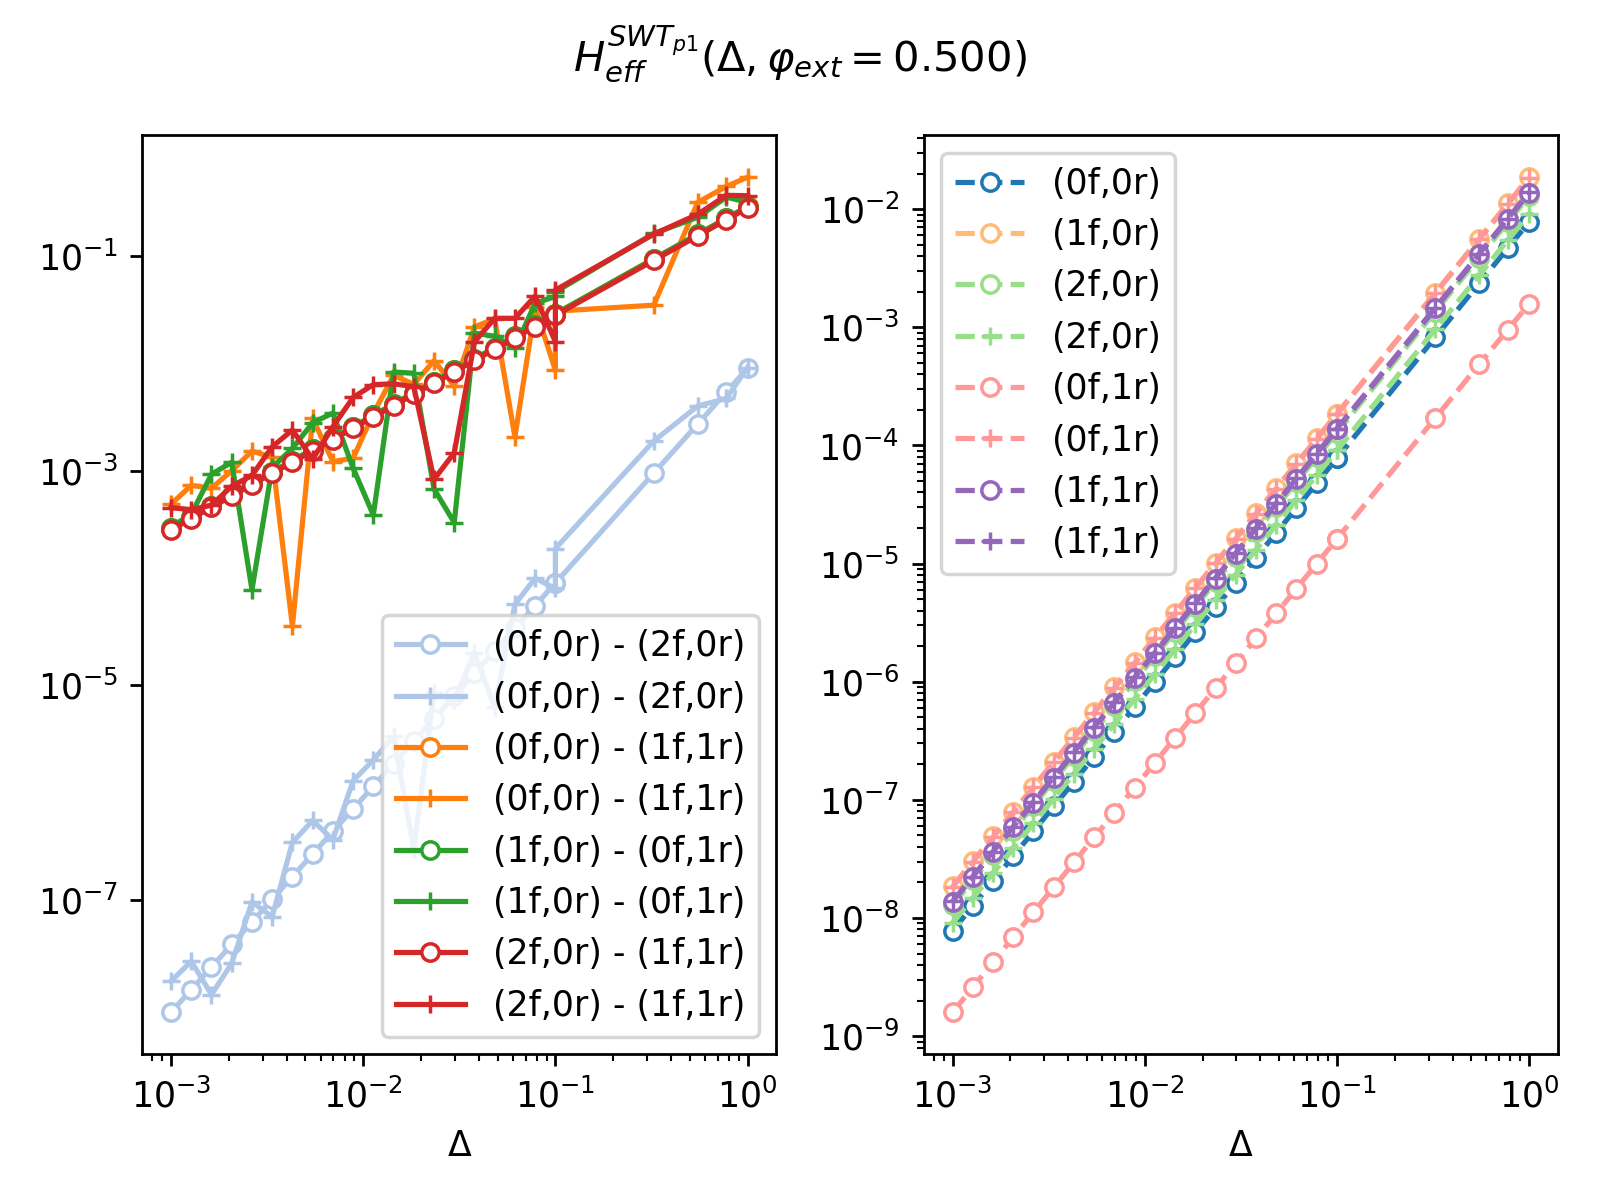

In [120]:
n_eig_plot = 5
colors = figs.generate_colors_from_colormap(20, 'tab20')
# colors = figs.generate_colors_from_colormap(40, 'viridis')
label_color_dict ={}
marker = ['o', '+', '.', '*']

φ_ext = 0.5
φ_ext_index = 1

fig, [ax1,ax2] = plt.subplots( ncols = 2, dpi=250 )
for i in range(n_eig_plot):
    for j in range(i, n_eig_plot):
        # for k, H_eff in enumerate( [H_eff_p1_vs_Δ_φ_ext, H_eff_SWT_vs_Δ_φ_ext] ) :
        for k, H_eff in enumerate( [H_eff_SWT_vs_Δ_φ_ext, np.abs(H_eff_SWT_vs_Δ_φ_ext-H_eff_p1_vs_Δ_φ_ext)] ) :
            # Effective hamiltonians using the full circuit
            if i!=j and np.any(np.abs(H_eff[φ_ext_index, 1:, i, j])>1e-3):
                label, i_f, j_f, i_r, j_r = sq_ext.get_state_label(N_f_vs_Δ_φ_ext[φ_ext_index,1,:], N_r_vs_Δ_φ_ext[φ_ext_index,1,:], i, j, return_numeric_indices=True)
                color, label_color_dict, _ = sq_ext.get_or_assign_color(label, colors, label_color_dict)
                ax1.plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]), markersize=5, label=label, color=color, marker = marker[k], markerfacecolor='w')
            elif i==j and np.any(np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 0, i, j])>1e-3):
                label, i_f, j_f, i_r, j_r = sq_ext.get_state_label(N_f_vs_Δ_φ_ext[φ_ext_index,1,:], N_r_vs_Δ_φ_ext[φ_ext_index,1,:], i, j, return_numeric_indices=True)
                color, label_color_dict, _ = sq_ext.get_or_assign_color(label, colors, label_color_dict)
                ax2.plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 0, i, j]), '--', markersize=5, label=label, color=color, marker = marker[k], markerfacecolor='w')

for ax in [ax1, ax2]:
    ax.set_xlabel('$\Delta$')
    ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.set_xlim([1e-2,1e0])
    # ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.legend()

fig.suptitle((r'$H_{eff}^{SWT_{p1}}(\Delta, \varphi_{ext}=$' + f'{φ_ext:.3f})'))

fig.tight_layout()
fig.show()

In [ ]:
E_frc_vs_Δ_φ_ext[0,-1] /(2*np.pi *GHz)

In [ ]:
np.abs(H_eff_vs_Δ_φ_ext[0,-1,:]-H_eff_vs_Δ_φ_ext[0,-1,0,0]*np.eye(n_eig))

In [ ]:
np.abs(H_eff_p1_frc_vs_Δ_φ_ext[0,0,1,1])

In [ ]:
φ_ext = φ_ext_avoided_crossing_1q_1r
φ_ext = 0
φ_ext = 0.5
n_eig_plot = 6
colors = figs.generate_colors_from_colormap(20, 'tab20')
label_color_dict ={}

# φ_ext_values_plot = [0.5, φ_ext_avoided_crossing_2q_1r, φ_ext_avoided_crossing_1q_1r, 0]
φ_ext_values_plot = np.array(φ_ext_values)
φ_ext_values_plot = np.array([0, 0.5])

fig, axs = plt.subplots(ncols = 3, nrows=len(φ_ext_values_plot), dpi=200, figsize = [16,12])

for l, H_eff in enumerate([H_eff_vs_Δ_φ_ext, H_eff_p1_vs_Δ_φ_ext, H_eff_p2_vs_Δ_φ_ext]):
    ax = axs[:,l]
    for k, φ_ext in enumerate(φ_ext_values_plot):
        φ_ext_index = (np.abs(φ_ext_values - φ_ext)).argmin()

        for i in range(n_eig_plot):
            for j in range(i, n_eig_plot):
                # label, i_f, j_f, i_r, j_r = \
                #     sq_ext.get_state_label(N_f_vs_Δ_φ_ext[φ_ext_index,1,:], N_r_vs_Δ_φ_ext[φ_ext_index,1,:], i, j, return_numeric_indices=True)
                # color, label_color_dict, _ = sq_ext.get_or_assign_color(label, colors, label_color_dict)

                # Effective hamiltonians using the full circuit
                if np.any(np.abs(H_eff[φ_ext_index, 1:, i, j])>1e-3) or \
                   np.any(np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 0, i, j])>1e-3):
                    if i != j:
                        label, i_f, j_f, i_r, j_r = \
                        sq_ext.get_state_label(N_f_vs_Δ_φ_ext[φ_ext_index,1,:], N_r_vs_Δ_φ_ext[φ_ext_index,1,:], i, j, return_numeric_indices=True)
                        color, label_color_dict, _ = sq_ext.get_or_assign_color(label, colors, label_color_dict)
                        ax[k].plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]), '-.', label=label, color=color)
                        # ax[k].plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 1:, 0, 0]), '-.', label=label, color=color)
                    # else:
                    #     ax[k].plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 0, i, j]), label=label, color=color, alpha=0.5)

                # First order effective hamiltonian using fluxonium + resonator model
                if np.any(np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j])>1e-3) or \
                   np.any(np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j])>1e-3):
                    if i != j:
                        ax[k].plot(Δ_values[1:], np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]), '*', label=label+' P_1', color=color, alpha=0.5)
                        # ax[k].plot(Δ_values[1:], np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, 0, 0]), '*', label=label+' P_1', color=color, alpha=0.5)
                    # else:
                    #     ax[k].plot(Δ_values[1:], np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j]),'*', label=label+' P_1', color=color, alpha=0.5)

                # Second order effective hamiltonian using fluxonium + resonator model
                if np.any(np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j])>1e-3) or \
                   np.any(np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j])>1e-3):
                    if i != j:
                        ax[k].plot(Δ_values[1:], np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]), 's', markersize=3, label=label+' P_2', color=color)
                    # else:
                    #     ax[k].plot(Δ_values[1:], np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j]),'s', markersize=3, label=label+' P_2, color=color)

        ax[k].set_xlabel('$\Delta$')
        ax[k].set_xscale('log')
        ax[k].set_yscale('log')
        # ax[k].set_ylim([1e-7,1e0])
        if l == 0:
            ax[k].set_title((r'$H_{eff}^{SWT_{exact}}(\Delta, \varphi_{ext}=$' + f'{φ_ext_values[φ_ext_index]:.3f})'))

        elif l == 1:
            ax[k].set_title((r'$H_{eff}^{SWT_{p1}}(\Delta, \varphi_{ext}=$' + f'{φ_ext_values[φ_ext_index]:.3f})'))

        else:
            ax[k].set_title((r'$H_{eff}^{SWT_{p2}}(\Delta, \varphi_{ext}=$' + f'{φ_ext_values[φ_ext_index]:.3f})'))
            ax[k].legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
fig.show()

In [ ]:
# H_eff[-1, 1:, 1, 2]
# H_eff[-1, 1:, 0, 0]
H_eff_p1_f_r_vs_Δ_φ_ext[-1, 1:, 0, 0]

In [ ]:
circ_0 = qubit_vs_Δ[0]
circ = qubit_vs_Δ[-1]
ψ_0 = sq_ext.real_eigenvectors(np.array([ψ_i.__array__()[:, 0] for ψ_i in circ_0._evecs]).T)
ψ   = sq_ext.real_eigenvectors(np.array([ψ_i.__array__()[:, 0] for ψ_i in circ.  _evecs]).T)
E_0 = circ_0.efreqs
E   = circ  .efreqs
H_0 = circ_0.hamiltonian().__array__() / GHz /2 /np.pi
H   = circ  .hamiltonian().__array__() / GHz /2 /np.pi
V   = (H-H_0)

In [ ]:
H_eff_1 = ψ_0.conj().T @ H @ ψ_0
n_eig = ψ_0.shape[1]
H_eff_2 = np.zeros((n_eig, n_eig), dtype=complex)  # matrix to store our results.

for i in range(n_eig):
    for j in range(n_eig):
        H_eff_2[i, j] = 1 / 2 * sum(
                      (1 / (E_0[i] - E[k]) + 1 / (E_0[j] - E[k])) *
                       (ψ_0[:, i].T.conj() @ V @ ψ[:, k]) * \
                       (ψ[:, k].T.conj() @ V @ ψ_0[:, j])
                       for k in range(n_eig))

In [ ]:
fig, ax = plt.subplots()
ax.plot(H_eff_1.ravel())
ax.plot(H_eff_2.ravel(), '.')
fig.show()

In [ ]:
Δ_value = 0.1

fig, ax = plt.subplots(dpi=200, figsize = [8,4.5])
Δ_index = (np.abs(Δ_values - Δ_value)).argmin()
colors = figs.generate_colors_from_colormap(20, 'tab20')
# colors = figs.generate_colors_from_colormap(30, 'viridis')
label_color_dict ={}
n_eig_plot=4

for i in range(n_eig_plot):
    for j in range(i, n_eig_plot):
        if np.any(np.abs(H_eff_vs_Δ_φ_ext[:, Δ_index, i, j])>1e-2) or \
                np.any(H_eff_vs_Δ_φ_ext[:, Δ_index, i, j]-H_eff_vs_Δ_φ_ext[:, Δ_index, 0, 0]>1e-2):
            labels = [sq_ext.get_state_label(N_f, N_r, i, j) for N_f, N_r in zip(N_f_vs_Δ_φ_ext[:,Δ_index], N_r_vs_Δ_φ_ext[:,Δ_index]) ]
            labels_and_intervals = sq_ext.find_indices(labels)

            for label, interval in labels_and_intervals:
                color, label_color_dict, newly_assigned = sq_ext.get_or_assign_color(label, colors, label_color_dict)
                if not newly_assigned:
                    label=None
                if i==j:
                    ax.plot(φ_ext_values[interval[0]:interval[-1]],\
                            H_eff_vs_Δ_φ_ext[interval[0]:interval[-1], Δ_index, i, j]- H_eff_vs_Δ_φ_ext[interval[0]:interval[-1], Δ_index, 0, 0], \
                            label=label, color=color)
                else:
                    ax.plot(φ_ext_values[interval[0]:interval[-1]], \
                            np.abs(H_eff_vs_Δ_φ_ext[interval[0]:interval[-1], Δ_index, i, j]), \
                            '-.',label=label, color=color)

ax.legend(framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(r'$\varphi_{ext}$')
ax.set_yscale('log')
fig.suptitle((r'$H_{eff}(\varphi_{ext}, \Delta=$' + f'{Δ_values[Δ_index]:.3f})'))
ax.set_ylim([1e-4,2e1])
ax.margins(0)
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-5, 2e1, 'k', '--', linewidth=1)
fig.tight_layout()
fig.show()

In [ ]:
U_to_I_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(qubit_vs_Δ)])
p1_to_SWT_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(qubit_vs_Δ)])
g_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(qubit_vs_Δ)])
for i in range(len(φ_ext_values)):
    for j in range(len(qubit_vs_Δ)):
        g = []
        for k in range(4):
            for l in range(k+1, 4):
                g.append(H_eff_vs_Δ_φ_ext[i, j, k, l ])
        g_vs_Δ_φ_ext[i,j] = max(g)
        U_to_I_vs_Δ_φ_ext[i,j] = np.sum((U_vs_Δ_φ_ext[i, j] - I)**2)
        p1_to_SWT_vs_Δ_φ_ext[i,j] = np.sum((H_eff_vs_Δ_φ_ext[i, j,:4,:4] - H_eff_p1_vs_Δ_φ_ext[i, j,:4,:4])**2)

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])

cont = ax.contourf(φ_ext_values, Δ_values[1:], np.log(g_vs_Δ_φ_ext[:,1:].T), vmin=-6, levels=np.linspace(-6,2,9))
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
fig.colorbar(cont, ticks=np.arange(-6,3))
fig.suptitle('$log(g)$')
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])
cont = ax.contourf(φ_ext_values, Δ_values[1:], np.log(U_to_I_vs_Δ_φ_ext[:,1:].T))#, vmin=-6, levels=np.linspace(-6,2,9))
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
fig.suptitle(r'$log||U-I||$')
fig.colorbar(cont)
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])
cont = ax.contourf(φ_ext_values, Δ_values[1:], np.log(p1_to_SWT_vs_Δ_φ_ext[:,1:].T))#, vmin=-6, levels=np.linspace(-6,2,9))
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
fig.suptitle(r'$log||H_{eff}^{SWT}-H_{eff}^{p1}||$')
fig.colorbar(cont)
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()

In [ ]:
N_r_vs_Δ_φ_ext

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])
cont = ax.contourf(φ_ext_values, Δ_values[1:], N_f_vs_Δ_φ_ext[:,1:,0].T)#, vmin=-6, levels=np.linspace(-6,2,9))
# ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
# fig.suptitle(r'$log||H_{eff}^{SWT}-H_{eff}^{p1}||$')
fig.colorbar(cont)
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()